# **ENCABEZADO**


**Analisis del Mercado Inmobiliario en CABA**
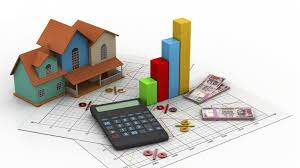



Se pretendió realizar un EDA del Mercado Inmobiliario de CABA a partir de los datos públicos generados, guardados y publicados por el Gobierno de la Ciudad de Buenos Aires. 

Se procedió a trabajar con los DataSets "Precio promedio Alquiler" y "Precio de Venta de Departamentos" elaborados por la Dirección General Calidad Institucional y Gobierno Abierto. 

Se realizó en primera instancia un análisis exploratorio para tener una mayor comprensión de los datos: identificación de tipos de datos, valores nulos y outliers, etc. 
Se avanzó también con la identificación de los valores nulos y de decidió eliminarlos. Esto produjo una reducción significativa de la base de datos.

Aclaraciones respecto de los datos sobre los que se trabajó:

**Precio promedio alquiler**
- Precio promedio mensual (**expresado en pesos**) de departamentos en alquiler de 2 y 3 ambientes usados y a estrenar en la Ciudad.
- Años abarcados : 2013 a 2019.
- Fuente DGEyC-GCBA en base sobre la base de datos de Argenprop.


**Precio de venta de departamentos**
- Precio promedio del m2 (**expresado en dólares**) de departamentos en venta de 2 y 3 ambientes usados y a estrenar.
- Años abarcados : 2010 a 2019. 
- Fuente DGEyC-GCBA en base sobre la base de datos de Argenprop.

# **Paquetes Instalados**

In [ ]:
# Instalación
!pip install jupyter-dash
!pip install dash
!pip install dash_core_components
!pip install dash_html_components
!pip install dash_table
!pip install dash_bootstrap_components

In [ ]:
pip install --upgrade plotly

In [3]:
#Instalación EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

# Instalación DASH
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input,Output,State
import dash_table
import dash_bootstrap_components as dbc
import plotly.express as px

In [ ]:
pip freeze > requirements.txt

In [ ]:
import types
def imports():
	for name, val in globals().items():
		if isinstance(val, types.ModuleType):
			if val.__name__ !='builtins':
				if val.__name__!='types':
					yield val.__name__
list(imports())

['IPython.core.shadowns',
 'numpy',
 'pandas',
 'matplotlib.pyplot',
 'plotly.graph_objects',
 'seaborn',
 'dash_core_components',
 'dash_html_components',
 'dash_table',
 'dash_bootstrap_components',
 'plotly.express']

# ALQUILERES EN **CABA**

In [4]:
precio_alq = pd.read_csv('/content/drive/MyDrive/DATOS/GCBA/Vivienda/precio-alquiler-deptos.csv')
precio_vta = pd.read_csv('/content/drive/MyDrive/DATOS/GCBA/Vivienda/precio-venta-deptos.csv')

In [ ]:
precio_alq.head(2)

,barrio,anio,mes,precio_prom,ambientes,comuna
0,AGRONOMIA,2013,Jul,NaN,3 ambientes,15
1,AGRONOMIA,2013,Ago,NaN,3 ambientes,15


In [ ]:
precio_alq.info()

In [ ]:
precio_vta.head(2)

,barrio,año,trimestre,precio_prom,ambientes,estado,comuna
0,AGRONOMIA,2010,1,NaN,2 ambientes,Usado,15
1,AGRONOMIA,2010,2,NaN,2 ambientes,Usado,15


In [ ]:
precio_alq.barrio.unique()

In [ ]:
 len(precio_alq.barrio.unique()) #== len(precio_vta.barrio.unique())  TENGO LA MISMA CANTIDAD DE BARRIOS 

48

In [ ]:
## TENGO MAS AÑOS EN UN DF QUE EN OTRO // DEBERIA CONSIDERAR FILTRAR EL DF DE VENTAS PARA QUEDARME CON LOS DATOS DE LOS AÑOS DEL DF DE ALQUILERES

In [ ]:
precio_alq.anio.unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [ ]:
precio_vta.año.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [ ]:
a = precio_alq.groupby(['barrio','anio', 'ambientes'], as_index=False)['precio_prom'].mean().sort_values('precio_prom', ascending=False)
a= a.reset_index(drop=True)
a.head()

In [ ]:
a.info()  ## TENGO UN MONTON DE VALORES NULOS 

In [6]:
pd.options.display.float_format = '{:.2f}'.format

In [7]:
a.precio_prom.isna().sum()   ## VALORES NULOS 

364

In [ ]:
b = a.loc[(a.precio_prom >=0),:].sort_values(by='precio_prom',ascending=True)   ## ACA TENGO FILTRADO POR AÑO Y SIN VALORES NULOS 
b = b.reset_index(drop=True)
b = b.rename(columns={'anio':'año'})  ## ASI CAMBIO EL NOMBRE DE LA COLUMNA
b.head()

In [9]:
b['ambientes'] = b['ambientes'].replace(
    {'2 ambientes': "2", 
     '3 ambientes': "3"}) 

In [ ]:
b['ambientes'].astype(str).astype(int)

In [11]:
fig1 = px.bar(data_frame = b,
            x = b['barrio'],
            y = b['precio_prom'],
            color = b['año'],
            facet_col = b['ambientes'],
            title = 'Precio promedio de alquileres en CABA por Barrio y Ambientes - Años 2013 a 2019',
            labels = {'precio_prom' : 'Precio Promedio' , 'barrio' : 'Barrio'}
        )
fig1.update_layout(
    showlegend = False,
    title = {"x":0.5,#centrar
             "y":0.9,#bajar
             "font":{"size":20, "color": "grey"}
             }  
)
plt.show()
fig1

In [ ]:
e = b.loc[(b['año'].isin([2018,2019])) ,:]
e.head(2)

In [13]:
fig2=px.bar(data_frame = e, x= 'barrio', y='precio_prom', color='ambientes', text='año',
           title = 'Precio promedio de alquileres  - Años 2018 y 2019',
           labels = {'barrio' : 'Barrio' , 'precio_prom' : 'Precio Promedio'}
           )
fig2.update_layout(showlegend = False,
           title = {"x":0.5,#centrar
                    "y":0.9,#bajar
                    "font":{"size":20, "color": "grey"}
                   }  
)
fig2.update_traces(texttemplate='%{text:0.2s}',textposition='outside'),
fig2

In [ ]:
c = precio_alq.groupby(['comuna','anio'], as_index=False)['precio_prom'].mean().sort_values('precio_prom', ascending=False)
c= c.loc[(c.precio_prom >=0),:].sort_values(by='precio_prom',ascending=True)   ## ACA TENGO FILTRADO POR AÑO Y SIN VALORES NULOS 
c = c.reset_index(drop=True)
c = c.rename(columns={'anio':'año'})  ## ASI CAMBIO EL NOMBRE DE LA COLUMNA
c

In [ ]:
d = c.loc[(c['año'] .isin ([2018,2019])),:].sort_values(by='comuna',ascending=False)
d.reset_index(drop=True)
d.head()

In [ ]:
d.loc[d.comuna == 8]

In [16]:
fig3 = px.bar(data_frame= d,
                  x = d['comuna'],
                  y = d['precio_prom'],
                  color = d['año'], 
                  title = 'Precio promedio de alquileres por Comuna - Años 2018 y 2019',
                  labels = {'precio_prom' : 'Precio Promedio' , 'comuna' : 'Comuna'}
                  )
fig3.update_layout(
    showlegend = False,
    title = {"x":0.5,#centrar
             "y":0.9,#bajar
             "font":{"size":20, "color": "grey"}
             }  
)
fig3

# VENTAS EN **CABA**

In [ ]:
precio_vta.head(2)

In [ ]:
precio_vta.info()  ## TAMBIEN TENGO MUCHOS VALORES NULOS

In [ ]:
precio_vta.isna().sum()    ## TAMBIEN TENGO MUCHOS VALORES NULOS  // SE DECIDE ELIMINARLOS SABIENDO QUE SE DEBILITA MUCHO EL DF

In [ ]:
for barrio in precio_alq.barrio.unique():             ## PATERL
  if barrio not in precio_vta.barrio.unique():
    print(barrio)

In [ ]:
for barrio in precio_vta.barrio.unique():
  if barrio not in precio_alq.barrio.unique():    
    print(barrio)                                     ## TENGO QUE ARREGLAR ESTE NOMBRE DE BARRIO

In [19]:
precio_vta["barrio"] = precio_vta["barrio"].replace({'PATERL': "PATERNAL"})   ## ARREGLADO

In [20]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
f = precio_vta.loc[precio_vta.precio_prom>=0]  ## FILTRO PARA ELIMINAR VALORES NULOS
f = f.reset_index(drop=True)
f.head()                             

In [ ]:
f.año.unique()

In [ ]:
f.ambientes.unique()

In [23]:
f['ambientes'] = f['ambientes'].replace(
    {'2 ambientes': "2", 
     '3 ambientes': "3"}) 

In [ ]:
f.estado.unique()      ## HAY QUE ARREGLAR TAMBIEN "A estrer"

In [24]:
f["estado"] = f["estado"].replace({'A estrer': "Nuevo"}) 

In [ ]:
f.estado.unique()       ## ARREGLADO

In [ ]:
f.info()

In [ ]:
f.tail()

In [ ]:
f.precio_prom.sort_values(ascending=False)

In [ ]:
f.head()

In [ ]:
l = f.groupby(['año', 'barrio', 'ambientes'], as_index=False)['precio_prom'].mean().sort_values(by='precio_prom', ascending=False)
l = l.reset_index(drop=True)
l.head(2)

In [ ]:
h = f.groupby(['año', 'barrio'], as_index=False)['precio_prom'].mean().sort_values(by='precio_prom', ascending=False)
h = h.reset_index(drop=True)
h.head()

In [27]:
fig4=px.treemap(data_frame= h.loc[h.año == 2019],
          path=[px.Constant('barrio'), 'barrio'],
           values='precio_prom',
           color='precio_prom',
           title = 'Precio promedio de venta por m2 - Año 2019')   
fig4.update_layout(
    showlegend = False,
    title = {"x":0.5,#centrar
             "y":0.9,#bajar
             "font":{"size":20, "color": "grey"}
             }  
)
fig4

In [28]:
p = {2018:'darkgreen',
     2019:'orange'}

In [ ]:
i = h.loc[h.año.isin([2018,2019]),:].sort_values('precio_prom', ascending=False).head(20)
i

In [30]:
fig6=px.line(data_frame=i,
        x='barrio',
        y='precio_prom',
        color= 'año',
        labels = {'barrio':'Barrio', 'precio_prom':'Precio promedio de Venta'},
        title = 'Top 20 de precios promedio de venta de departamentos de la CABA - Años 2018 y 2019')
fig6

In [ ]:
j = f.groupby(['año', 'barrio','ambientes'], as_index=False)['precio_prom'].mean().sort_values(by='precio_prom', ascending=False)
j = j.reset_index(drop=True)
j = j.loc[j.año.isin([2018,2019])].sort_values('precio_prom', ascending=False).head(30)
j.barrio.unique()

In [ ]:
k = f.groupby(['año', 'barrio','ambientes', 'estado'], as_index=False)['precio_prom'].mean().sort_values(by='precio_prom', ascending=False)
k = k.reset_index(drop=True)
k = k.loc[k.año.isin([2018,2019])].sort_values('precio_prom', ascending=False).head(30)
k.head()

In [33]:
fig7 = px.bar(data_frame = k,
            x = k['barrio'],
            y = k['precio_prom'],
            color = k['año'],
            facet_col = k['estado'],
            hover_name = k['año'],
            title = 'Precio promedio de venta de departamentos en CABA - Nuevo o Usado',
            labels = {'precio_prom' : 'Precio Promedio' , 'barrio' : 'Barrio'}
        )
fig7.update_layout(
    showlegend = False,
    title = {"x":0.5,#centrar
             "y":0.9,#bajar
             "font":{"size":25, "color": "grey"}
             }  
)
plt.show()
fig7

In [ ]:
z = f.loc[f.año == 2019]
z.head()

In [ ]:
z = z.groupby(['barrio','estado', 'comuna'], as_index=False)['precio_prom'].mean().sort_values(by='precio_prom', ascending=False)
z = z.reset_index(drop=True)
z.head()

In [36]:
fig5=px.pie(                                                                            
    data_frame= z,
    names = 'comuna',
    values= 'precio_prom',
    color = 'estado',
    title='Precio de venta de departamentos por m2 por Comunas - Año 2019',
    hole=0.4
)
fig5.update_traces(
    textfont_size=11,
    marker={'line': {'color':'black',
                     'width':1}})
fig5

# **DASH**

In [ ]:
app = JupyterDash(__name__, meta_tags=[{"name": "viewport", "content": "width=device-width"}],external_stylesheets=[dbc.themes.BOOTSTRAP])

app.title = 'Analisis del mercado inmobiliario en CABA - período 2013 a 2019'

app.layout = html.Div(children = [
                                 html.Div(children=[
          html.H6('Analisis del Mercado Inmobiliario en CABA', style={'background-color':'LightGray', 'color':'Black', 'text-align': 'left', 'width':'60%', 'display': 'inline-block'}),
          html.A(
          id='github-link',
          children=['Ver codigo en Github'],
          href='https://github.com/Gordin-Flona/Analisis-del-Mercado-Inmobiliario---CABA', 
          style= {'display': 'inline-block', 'width':'40%', 'background-color':'LightGray', 'text-align': 'right'}
                 ),
                ],
                className = 'app-header',
      ),
      html.P(' '),
      html.Div(
          [
           html.H2('Analisis del Mercado Inmobiliario - alquiler y compra de departamentos en CABA'),
           html.P('Realicé un EDA del Mercado Inmobiliario de CABA a partir de los datos públicos generados, guardados y publicados por el Gobierno de la Ciudad de Buenos Aires. Trabajé con los DataSets "Precio promedio Alquiler" y "Precio de Venta de Departamentos" elaborados por la Dirección General de Calidad Institucional y Gobierno Abierto.',
                    style={'font-family': 'Arial'}),
           html.A('Pagina web para acceder a los datos publicos de CABA',
                  href='https://data.buenosaires.gob.ar/dataset/mercado-inmobiliario',
                  target='blank',),
           html.P(' '),
           html.P ('Algunas consideraciones respecto de los datos utilizados:', style={'font-family': 'Arial', 'text-decoration': 'underline'}),
           html.P('Precio promedio alquiler:precio promedio mensual (expresado en pesos) de departamentos en alquiler de 2 y 3 ambientes usados y a estrenar en la Ciudad. Años abarcados : 2013 a 2019. Fuente DGEyC-GCBA en base sobre la base de datos de Argenprop.', style={'font-family': 'Arial'}),
           html.P('Precio de venta de departamentos: precio promedio del m2 (expresado en dólares) de departamentos en venta de 2 y 3 ambientes usados y a estrenar. Años abarcados : 2010 a 2019. Fuente DGEyC-GCBA en base sobre la base de datos de Argenprop.', style={'font-family': 'Arial'}),
           html.P(' '),
           html.P('En primera instancia y para tener una mayor comprension de los datos procedí con el análisis de tipos de datos, valores nulos y outliers, etc. Avancé con la identificacion de los valores nulos y verifiqué que gran parte de los datos referidos a los valores de las propiedades era inexistente. Por ello decidí eliminarlos. Esto produjo una reduccion significativa de la base de datos lo que hace que este análisis sea meramente descriptivo y no profundamente analítico.',
                  style={'font-family': 'Arial'})
           ]
              ),
      html.Div(children=[
                         dcc.Graph(id='bar1', figure=fig1),], 
                         style={'width':'90%', 'margin':'100px' '100px' '100px' '100px' ,'border': '1px' 'solid black'}),
      html.P(' '),
      html.P('............................ '),
      html.P(' '), 
      html.Div(children=[
                         dcc.Graph(id='bar2', figure=fig2),],
                         style={'width':'90%', 'margin':'100px' '100px' '95px' '95px' ,'border': '1px' 'solid black'}),
      html.P(' '),
      html.P('............................ '),
      html.P(' '),
      html.Div(children=[
                         dcc.Graph(id='bar3', figure=fig3),],
                         style={'width':'90%', 'margin':'100px' '100px' '95px' '95px' ,'border': '1px' 'solid black'}),
      html.P(' '),
      html.P('............................ '),
      html.P(' '),
      html.Div(children=[
                         dcc.Graph(id='treemap', figure=fig4),],
                         style={'width':'90%', 'margin':'100px' '100px' '95px' '95px' ,'border': '1px' 'solid black'}),
      html.P(' '),
      html.P('............................ '),
      html.P(' '),
      html.Div(children=[
                         dcc.Graph(id='line', figure=fig6),],
                         style={'width':'90%', 'margin':'100px' '100px' '95px' '95px' ,'border': '1px' 'solid black'}),
      html.P(' '),
      html.P('............................ '),
      html.P(' '),
      html.Div(children=[
                         dcc.Graph(id='bar3', figure=fig7),],
                         style={'width':'90%', 'margin':'100px' '100px' '95px' '95px' ,'border': '1px' 'solid black'}),
      html.P(' '),
      html.P('............................ '),
      html.P(' '),
      html.Div(children=[
                         dcc.Graph(id='pie', figure=fig5),],
                         style={'width':'90%', 'margin':'100px' '100px' '95px' '95px' ,'border': '1px' 'solid black'}),
      html.P(' ')   
      ])
               
if __name__=='__main__':  
  app.run_server(mode='external')